<a href="https://colab.research.google.com/github/drewwint/Quant-Family-Collective-fMRI-stats/blob/main/DWinters_QFC_wb3_fMRI_Task_2nd_brain.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task-based fMRI: Whole brain GLM and second-level analysis
### Drew E. Winters, PhD.

In this tutorial we will fit a GLM to perform a second level analysis in experimental data and visualizing the results

We will use realistic data available in the Nilear package. Specifically we will download a sample of 16 participants completing a visual checkerboard activity in an fMRIs. We will compare verticle and horizontal checkerboard conditions - this means participants were in the scanner exposed to visual stimuli oriented in horizontal then vertically.

A paired t-test is applied to the brain maps in order to see the effect of the contrast difference across subjects, considering subject intercepts

The contrast is between responses to retinotopically distinct vertical versus horizontal checkerboards. At the individual level, these stimuli are sometimes used to map the borders of primary visual areas. At the group level, such a mapping is not possible. Yet, we may observe some significant effects in these areas.

In thsi tutorial we will:
1. download the data
2. build a design matrix
3. run second level analysis
4. plot the results on to a brain
  - unthresholded
  - false discovery rate thresholded
5. download a checkerborard brain mask from neurovault
6. apply the mask to the brain and rerun analyses
7. extract clusters
8. plot data

Lets start with downloading packages

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
! pip install nilearn &> /dev/null
! pip install nltools &> /dev/null
from nilearn import plotting
from nilearn.datasets import fetch_localizer_contrasts
import nilearn

## Downloading data

We will estract data from the Nilearn package

Implicitly, there is a one-to-one correspondence between the two samples:
the first image of both samples comes from subject S1, the second from subject S2 etc.

We will look at the associated dataframe to verify

In [ ]:
n_subjects = 16
sample_vertical = fetch_localizer_contrasts(
    ["vertical checkerboard"],
    n_subjects,
    get_tmaps=True,
    legacy_format=False
)
sample_horizontal = fetch_localizer_contrasts(
    ["horizontal checkerboard"],
    n_subjects,
    get_tmaps=True,
    legacy_format=False,
)




Dataset created in /root/nilearn_data/brainomics_localizer



 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (1 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


 ...done. (2 seconds, 0 min)


#### Vertical participant values

In [ ]:
sample_vertical.ext_vars

,participant_id,age,sex,site,family,language,nuage2,pente_dots_lin,couleur,nom_des_gens,...,g_contrarie,lecture_ok,pb_en_3d,pb_2eme_langue,oiseau,pb_egocentrique,pseudo,pente_estim_qt,autoevaluation_rotation,pb_orthogr
0,S01,24.0,M,SHFJ,F01,French,35.0,0.416922,NaN,NaN,...,False,True,False,False,2.4,False,15.0,0.988097,4.0,False
1,S02,20.0,M,SHFJ,F02,French,30.0,0.529093,NaN,NaN,...,False,True,False,False,1.5,False,16.0,1.152210,3.0,False
2,S03,22.0,F,SHFJ,F03,French,35.0,0.458570,NaN,NaN,...,False,False,False,False,2.5,False,14.0,0.740778,2.0,False
3,S04,20.0,M,Neurospin,F04,French,20.0,0.240791,1.0,1.0,...,True,True,True,False,3.5,False,19.0,0.791295,2.0,False
4,S05,23.0,F,Neurospin,F05,French,40.0,0.334500,1.0,1.0,...,False,True,True,True,1.0,False,16.0,1.027320,3.0,False
5,S06,19.0,M,Neurospin,F06,French,30.0,0.526380,NaN,NaN,...,False,True,False,True,2.0,False,18.0,1.050800,NaN,False
6,S07,26.0,F,Neurospin,F07,French,60.0,0.887654,1.0,1.0,...,False,True,True,False,2.0,False,22.0,0.958523,1.0,False
7,S08,27.0,M,Neurospin,F89,French,30.0,0.378301,NaN,NaN,...,False,True,False,False,1.9,False,19.0,0.959285,3.0,False
8,S09,21.0,F,Neurospin,F09,French,100.0,1.295910,NaN,NaN,...,False,True,True,False,1.5,False,17.0,1.226310,1.0,False
9,S10,24.0,F,SHFJ,F10,French,43.0,0.534045,NaN,NaN,...,False,True,False,False,3.0,False,15.0,0.999617,2.0,False


#### Horizontal participant values

In [ ]:
sample_horizontal.ext_vars

,participant_id,age,sex,site,family,language,nuage2,pente_dots_lin,couleur,nom_des_gens,...,g_contrarie,lecture_ok,pb_en_3d,pb_2eme_langue,oiseau,pb_egocentrique,pseudo,pente_estim_qt,autoevaluation_rotation,pb_orthogr
0,S01,24.0,M,SHFJ,F01,French,35.0,0.416922,NaN,NaN,...,False,True,False,False,2.4,False,15.0,0.988097,4.0,False
1,S02,20.0,M,SHFJ,F02,French,30.0,0.529093,NaN,NaN,...,False,True,False,False,1.5,False,16.0,1.152210,3.0,False
2,S03,22.0,F,SHFJ,F03,French,35.0,0.458570,NaN,NaN,...,False,False,False,False,2.5,False,14.0,0.740778,2.0,False
3,S04,20.0,M,Neurospin,F04,French,20.0,0.240791,1.0,1.0,...,True,True,True,False,3.5,False,19.0,0.791295,2.0,False
4,S05,23.0,F,Neurospin,F05,French,40.0,0.334500,1.0,1.0,...,False,True,True,True,1.0,False,16.0,1.027320,3.0,False
5,S06,19.0,M,Neurospin,F06,French,30.0,0.526380,NaN,NaN,...,False,True,False,True,2.0,False,18.0,1.050800,NaN,False
6,S07,26.0,F,Neurospin,F07,French,60.0,0.887654,1.0,1.0,...,False,True,True,False,2.0,False,22.0,0.958523,1.0,False
7,S08,27.0,M,Neurospin,F89,French,30.0,0.378301,NaN,NaN,...,False,True,False,False,1.9,False,19.0,0.959285,3.0,False
8,S09,21.0,F,Neurospin,F09,French,100.0,1.295910,NaN,NaN,...,False,True,True,False,1.5,False,17.0,1.226310,1.0,False
9,S10,24.0,F,SHFJ,F10,French,43.0,0.534045,NaN,NaN,...,False,True,False,False,3.0,False,15.0,0.999617,2.0,False


Participant linke up by age, ID, ses, site, vamily, language ect...

### Second-level analysis

lets run second level analysis

we will
1. concatenate the stimuli so that they are stacked
2. create a contrast
3. create a design matrix
4. plot this design matrix
5. run analysis

In [ ]:
second_level_input = sample_vertical["cmaps"] + sample_horizontal["cmaps"]

In [ ]:
import numpy as np

contrast = np.hstack(([1] * n_subjects, [-1] * n_subjects))

In [ ]:
contrast

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [ ]:
subject_effect = np.vstack((np.eye(n_subjects),
                            np.eye(n_subjects)))
subjects = [f"S{i:02d}" for i in range(1, n_subjects + 1)]

In [ ]:
subject_effect

array([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,

In [ ]:
paired_design_matrix = pd.DataFrame(
    np.hstack((contrast[:, np.newaxis],
               subject_effect)),
    columns=["Contrast"] + subjects,
)

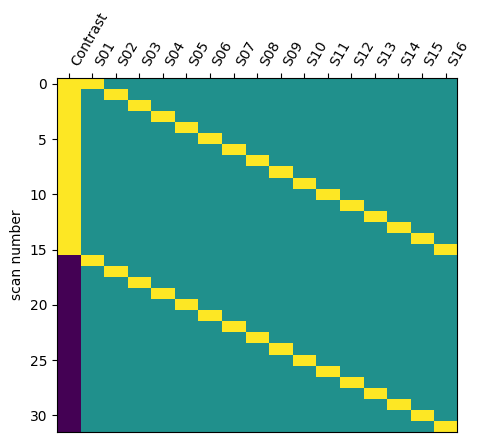

In [ ]:
from nilearn.plotting import plot_design_matrix

plot_design_matrix(paired_design_matrix, rescale=False)
plt.tight_layout()
plotting.show()

In [ ]:
from nilearn.glm.second_level import SecondLevelModel

slm = SecondLevelModel().fit(
    second_level_input,
    design_matrix=paired_design_matrix
)

In [ ]:
# vertical vs horizontal

stat_maps_paired = slm.compute_contrast(
    "Contrast",
    output_type="all"
)

In [ ]:
pd.Series(stat_maps_paired)

z_score            <class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
stat               <class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
p_value            <class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
effect_size        <class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
effect_variance    <class 'nibabel.nifti1.Nifti1Image'>\ndata sha...
dtype: object

In [ ]:
(
stat_maps_paired["effect_size"].get_fdata()
).max()

2.9092006534338006

## Plotting results

Now we will take the resutls of our second-level analysis for all voxels and plot them on to a brain template.

We will look at plotting effect sizes, unthresholded z values, and thresholded z values

#### False discovery rate correction threshold for activation

This value represents at what z value that z values should be thresholded for a corredted significance (at the specificed alpha) accounting for multiple comparisions.

In [ ]:
_, fdr = nilearn.glm.threshold_stats_img(stat_maps_paired["z_score"], alpha=0.05, height_control="fdr")
fdr

3.7805564417232826

#### Plotting effect sizes

We will start with plotting effect sizes inorder to see where the peaks of activatino are most meaninful.

we will then compare thsi to a thresholded and unthresholded plot to see if we retain the most importnat

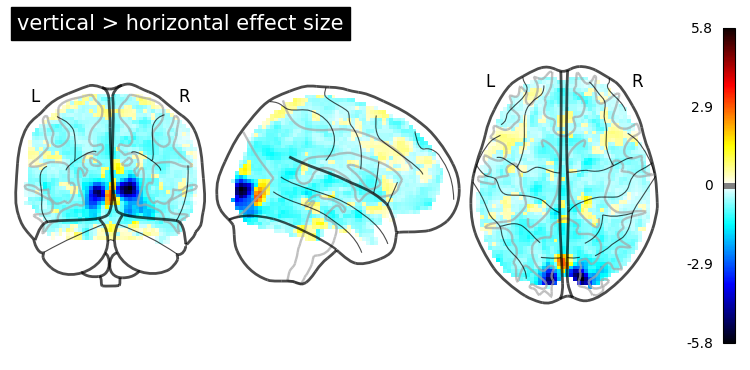

In [ ]:
plotting.plot_glass_brain(
    stat_maps_paired["effect_size"], # Note we are plotting effect
    colorbar=True,
    plot_abs=False,
    title="vertical > horizontal effect size",
)

plotting.show()

#### Unthresholded plot

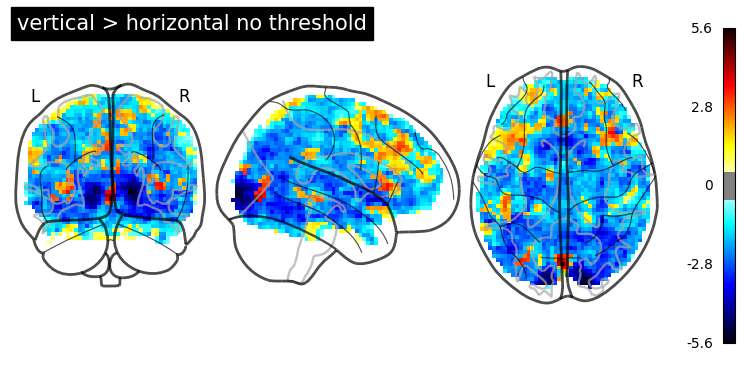

In [ ]:
plotting.plot_glass_brain(
    stat_maps_paired["z_score"], # Note we are plotting zscores
    colorbar=True,
    plot_abs=False,
    title="vertical > horizontal no threshold"
)

plotting.show()

See how the whole brain appears to strong values - it is hard to visually identify the areas of most meaningful activation

#### fdr corrected thresholded plot

Here we appear to retain the areas of activation that are the most statistically meaninful

this appears to reflect the effect size plot.

We are plotting the z values because it represents the activation across participants brains on a standardized scale.

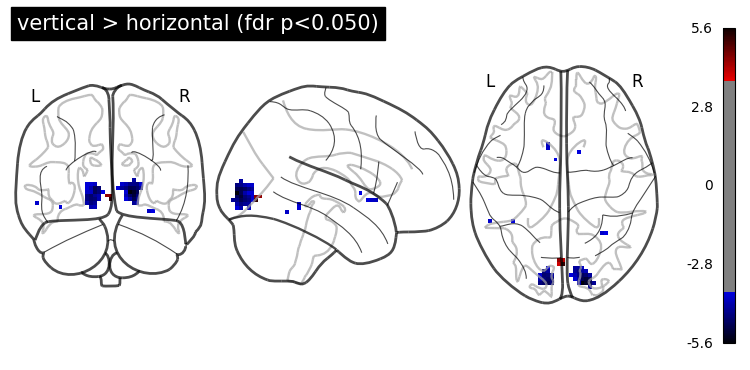

In [ ]:

display = plotting.plot_glass_brain(
    stat_maps_paired["z_score"], ## Note we are plotting zscores
    threshold=fdr,
    colorbar=True,
    plot_abs=False,
    title="vertical > horizontal (fdr p<0.050)"
)

plotting.show()

# Applying a mask

Let apply a mask to our brain data to focus on only the most relevant areas of activation.

We will complete the following steps
 - 1) download a statistical map that is specific to the checkerboard task from Neurovalut.org
 - 2) take that statistical map and create a mask that represents only the most relevant areas of the brain for the checkerborard task
 - 3) apply this mask to our brain data
 - 4) rerun our analysis and plot the results


Lets start with (1) and download the mask


In [ ]:
# https://neurovault.org/collections/8501/
from nilearn.datasets import fetch_neurovault_ids
cb_rois = fetch_neurovault_ids(collection_ids=[8501],image_ids=[396449])


Dataset created in /root/nilearn_data/neurovault

Reading local neurovault data.
No image found on local disk.
Reading server neurovault data.
getting new batch: https://neurovault.org/api/collections/8501
Scroll images from collection 8501: getting new batch: https://neurovault.org/api/collections/8501/images/?limit=100&offset=0
Scroll images from collection 8501: batch size: 1
Download succeeded, downloaded to: /root/nilearn_data/neurovault/collection_8501/image_396449.nii.gz
Already fetched 1 image
On neurovault.org: 1 imagematched query in collection 8501


What we have now is a brain volumn with representative t values. We will transform these t values into a binary mask for focusing analyses on the most relevant regions.

Lets take a look at what this t value map looks like.

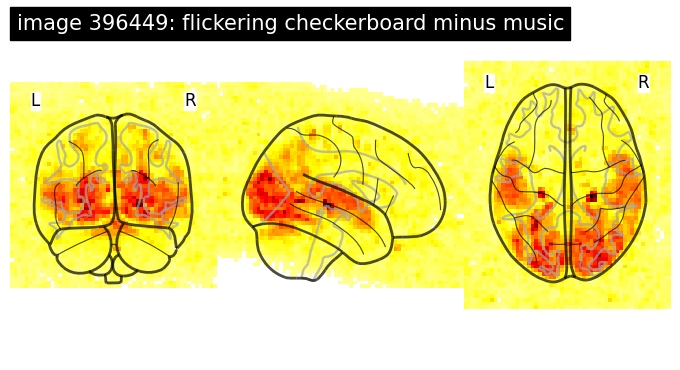

In [ ]:
for im in cb_rois.images_meta:
    plotting.plot_glass_brain(
        im["absolute_path"],
        title=f"image {im['id']}: {im['contrast_definition']}",
    )


We first want to convert this map to z scores so we will define a function to do that. Then we will load or map of t values and apply this function to that image to make the conversion.  

In [ ]:
def t_to_z(t_scores, deg_of_freedom):
    """Convert t-scores to z-scores."""
    p_values = scipy.stats.t.sf(t_scores, df=deg_of_freedom)
    z_values = scipy.stats.norm.isf(p_values)
    return z_values

In [ ]:
t_img = nilearn.image.load_img(cb_rois.images[0])
t_img.shape

(56, 67, 56)

In [ ]:
cb_rois.images_meta[0]["number_of_subjects"]

23

In [ ]:
import scipy
z_img = nilearn.image.new_img_like(t_img,
                                   t_to_z(nilearn.image.get_data(t_img),
                                          deg_of_freedom=cb_rois.images_meta[0]["number_of_subjects"]))


Now we will investigate the results

lets look at the shape and min/max values

In [ ]:
z_img.shape

(56, 67, 56)

In [ ]:
z_img.get_fdata().min()

-6.804951071348929

In [ ]:
z_img.get_fdata().max()

7.439191199337614

#### Creating the mask

Now we will take the z_img we created and create a mask from these values by thresholding and retaining the most meaninful regions.

Meaninful regions will be identified usign the threshold for z values that are either < -3.1 or > 3.1.

Every voxel inside the most meaninful areas will be listed as 1's and all other regions will be listed as 0's

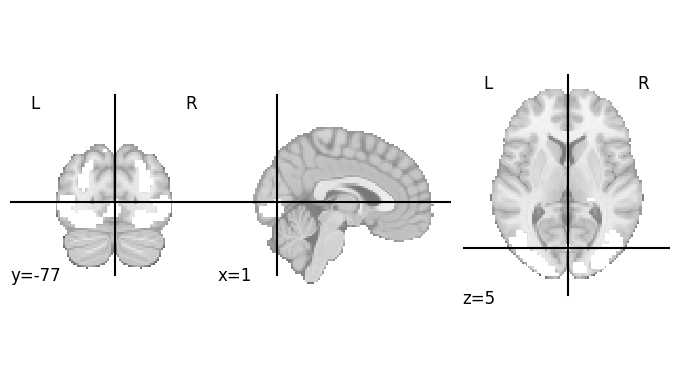

In [ ]:
# z score > 3.1 corresponds to  p < .001, uncorrected

mask1 = nilearn.image.math_img('z_img > 3.1', z_img=z_img)

# https://neurovault.org/collections/8501/
nilearn.plotting.plot_stat_map(mask1, colorbar= False)

as you can see the white areas are where the most meaninful areas related to this task. This will be our mask.

### Applying mask and running group-analyses

We will run the same analysis - only this time we will spedify a mask image that we created and the shape of trasformation required to match the mask to the brain (i.e., affine transformation).

In [ ]:
from nilearn.glm.second_level import SecondLevelModel

ta = nilearn.image.load_img(second_level_input[0]).affine

slm2 = SecondLevelModel(mask_img = mask1,
                       target_affine=ta).fit(
    second_level_input,
    design_matrix=paired_design_matrix
)

In [ ]:
stat_maps_paired2 = slm2.compute_contrast(
    "Contrast",
    output_type="all"
)

### Plotting masked analysis

#### Unthresholded plot

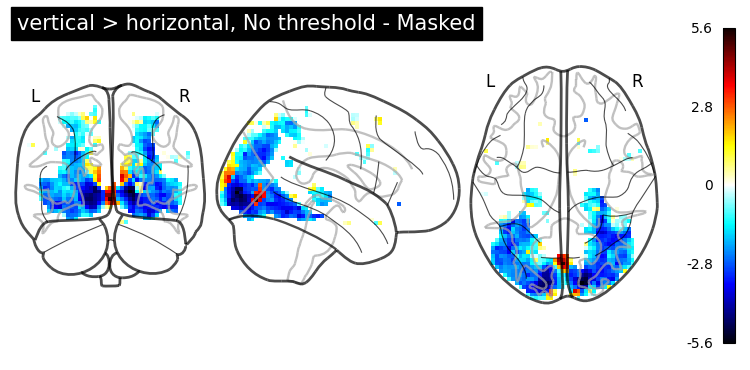

In [ ]:


display = plotting.plot_glass_brain(
    stat_maps_paired2["z_score"], ## Note we are plotting zscores
    colorbar=True,
    plot_abs=False,
    title="vertical > horizontal, No threshold - Masked"
)

plotting.show()

you can see the activation is not focused on the areas of the brain defined by our mask

### FDR thresholded plot

In [ ]:
_, fdr = nilearn.glm.threshold_stats_img(z_img, alpha=0.05, height_control="fdr")
fdr

3.160114607042978

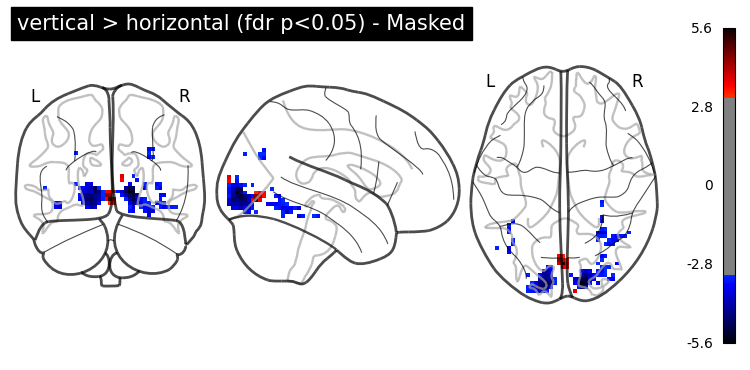

In [ ]:

display = plotting.plot_glass_brain(
    stat_maps_paired2["z_score"], ## Note we are plotting zscores
    threshold=fdr,
    colorbar=True,
    plot_abs=False,
    title="vertical > horizontal (fdr p<0.05) - Masked"
)

plotting.show()

you can see we have very similar results as the unmasked

only we have slightly larger defined regions

Thsi is because we are not looking at the entire brain so we have less multiple comparisions to correct for making the threshold not as stringent.

# Clusters for reporting and plotting

We can cluster the activatino patterns to report the most significant places of activation

In [ ]:
from nilearn.reporting import get_clusters_table

table = get_clusters_table(
    stat_maps_paired2["z_score"],
    stat_threshold=fdr,
    cluster_threshold=10,
    two_sided = True #,
    #return_label_maps= True
)
table

,Cluster ID,X,Y,Z,Peak Stat,Cluster Size (mm3)
0,1,0.0,-78.0,-6.0,5.224377,540
1,1,15.0,-93.0,0.0,-5.601642,1998
2,1a,30.0,-84.0,-12.0,-3.530186,
3,2,-12.0,-93.0,3.0,-4.945472,2808
4,2a,-15.0,-96.0,-6.0,-4.863312,
5,3,30.0,-54.0,-15.0,-3.999675,378
6,3a,27.0,-60.0,-6.0,-3.327422,
7,4,42.0,-57.0,-12.0,-3.639708,405
8,4a,36.0,-63.0,-9.0,-3.567017,


we have a total of 4 clusters with some of these flusters having more than one peak of activation (e.g., fluster 4 encompases peak activations at two close locations).

#### Making mask from our findings

We can take these coordinates to make another mask that is specific to our findings - so we can further explore these regions significance by uploading it to neurovault and decoding the mask in neurosynth.

In [ ]:
id_cords = np.ndarray.tolist(np.array(table.iloc[:,1:4]))

In [ ]:
from nltools.mask import create_sphere
import warnings
warnings.filterwarnings("ignore")

shpere = create_sphere(id_cords,
                       radius = 6)

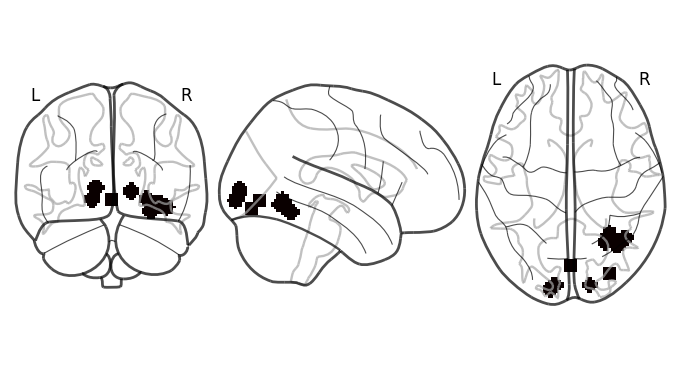

In [ ]:
nilearn.plotting.plot_glass_brain(shpere)

### plotting clusters for publication
We can define a statistical map as a figure for a publication.

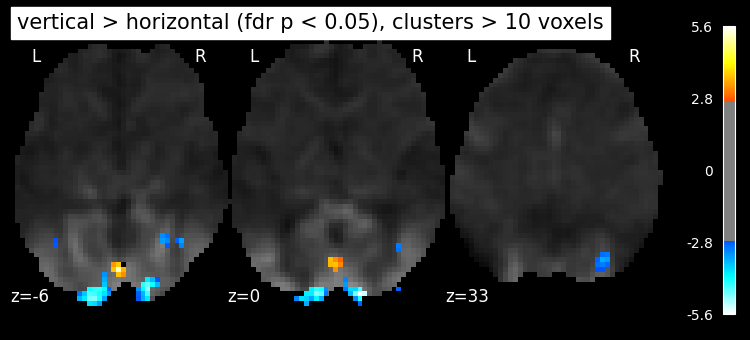

In [ ]:
clean_map, threshold = nilearn.glm.threshold_stats_img(
    stat_maps_paired2["z_score"],
    alpha=0.05,
    height_control="fdr",
    cluster_threshold=10,
    two_sided = True
)

mean_img = nilearn.image.mean_img(second_level_input)

nilearn.plotting.plot_stat_map(
    clean_map,
    bg_img=mean_img,
    threshold=threshold,
    display_mode="z",
    cut_coords=3,
    black_bg=True,
    title="vertical > horizontal (fdr p < 0.05), clusters > 10 voxels",
)
plt.show()

## Summary

Now we have run our own task-based analysis

There are many other approaches to this type of data for more nuanced questions - however I hope you have a sense of how these analyses look and are run.

[Here is an example of differnet types of analyses that you could run](https://www.frontiersin.org/articles/10.3389/fnins.2016.00515/full )

Next we will change course and look at functional connectivity analyses.